<a href="https://colab.research.google.com/github/amisticaz/imersoes_python_ALURA/blob/main/Aula_02_e_3_de_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 2 - Preparação e limpeza dos Dados
### Nessa aula vamos aprender a  renomear colunas, identificar e tratar dados faltantes.

In [56]:
import pandas as pd

In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [58]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [59]:

# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [60]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [61]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


#### Checando quais anos existem no DataFrame:

In [62]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

#### Exibindo quais linhas estão com os anos nulos:

In [63]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,SE,FT,Product Manager,184500,USD,184500,US,0,US,M
59692,NaN,MI,FT,Engineer,110000,USD,110000,DE,0,DE,M
59710,NaN,EN,FT,Data Scientist,208800,USD,208800,US,0,US,M
59759,NaN,SE,FT,Software Engineer,135000,USD,135000,US,0,US,M
59789,NaN,SE,FT,Engineer,112000,USD,112000,US,0,US,M
131000,NaN,SE,FT,Machine Learning Engineer,163800,USD,163800,US,0,US,M
131006,NaN,SE,FT,Data Analytics Manager,204500,USD,204500,US,0,US,M
133054,NaN,EN,FT,Data Scientist,40000,USD,40000,JP,100,MY,L
133281,NaN,MI,FT,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,L
133317,NaN,MI,FT,Data Scientist,130000,USD,130000,US,50,US,L


#### 1. Preenchimento com Valores Derivados (Imputation)
#### Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

#### 2. Remover Linhas com Dados Faltantes
#### Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

#### 3. Inferência e Preenchimento com Regras de Negócio
#### Preencher com base em regras claras.

| Estratégia                     | Quando usar                                                               |
|-------------------------------|---------------------------------------------------------------------------|
| **Imputação inteligente**      | Quando os dados faltantes são significativos para a análise               |
| **Remoção de linhas**          | Quando o volume de nulos é pequeno e não afeta o dataset                  |
| **Preenchimento baseado em regra** | Quando há lógica ou negócio claro para inferir o valor                   |


## Exemplos fictícios
### Exemplo de preenchimento com média e mediana

In [64]:
import pandas as pd
import numpy as np

df_salarios = pd.DataFrame({
    "nome": ["Kethelen", "Calebe", "Camila", "Jess"],
    "salario": [np.nan, 1800, np.nan, 2000]
})

# Preencher com a média salarial
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Preencher com a mediana salarial
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

print(df_salarios)


       nome  salario  salario_media  salario_mediana
0  Kethelen      NaN         1900.0           1900.0
1    Calebe   1800.0         1800.0           1800.0
2    Camila      NaN         1900.0           1900.0
3      Jess   2000.0         2000.0           2000.0


### Exemplo de preenchimento com o valor anterior

 Usar ffill (forward fill)


> Em Pandas, ffill, abreviação de "forward fill", é um método usado para preencher valores ausentes (NaN) em um DataFrame ou Series, propagando o último valor válido conhecido para frente na sequência. É uma técnica comum para lidar com dados faltantes em séries temporais ou qualquer conjunto de dados onde a continuidade é importante.



In [65]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


### Exemplo de preenchimento com o valor posterior

Usar bfill (backward fill)



> Em pandas, bfill()(ou preenchimento reverso) éum método usado para lidar com dados ausentes (valores NaN) preenchendo-os com o próximo valor válido encontrado na série ou DataFrame. Basicamente, ele propaga o próximo valor disponível para trás para substituir os dados ausentes.





In [66]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,Seg,30.0,30.0
1,Ter,NaN,28.0
2,Qua,NaN,28.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


### Exemplo de preenchimento com valor fixo

In [67]:
df_cidades = pd.DataFrame({ #criando dataframa pd.DataFrame por isso abre o ({ })
 # depois criando dicionario, vou ter um nome, uma cidades, sempre que ha criacao do dicionario, uma lista ([ ])
  #se e um metodo que esta chamando vai ser ()
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_corrigida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_corrigida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


## Tratando o nosso DataFrame

### Removendo os dados nulos

In [87]:
df_limpo = df.dropna()

In [88]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [89]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [90]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  int64  
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


In [91]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

#Aula 3 - Visualização de Dados
### Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.

In [73]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

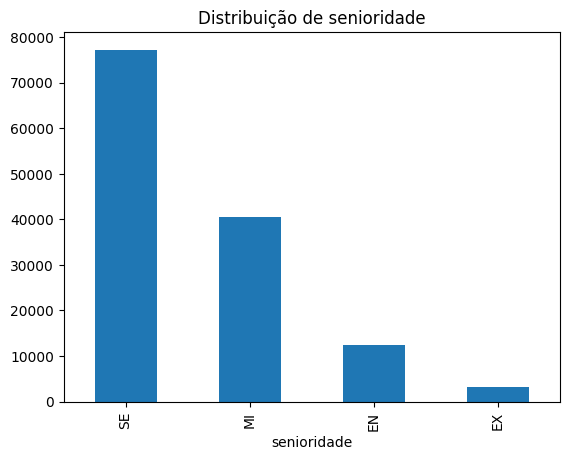

In [74]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")

In [75]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

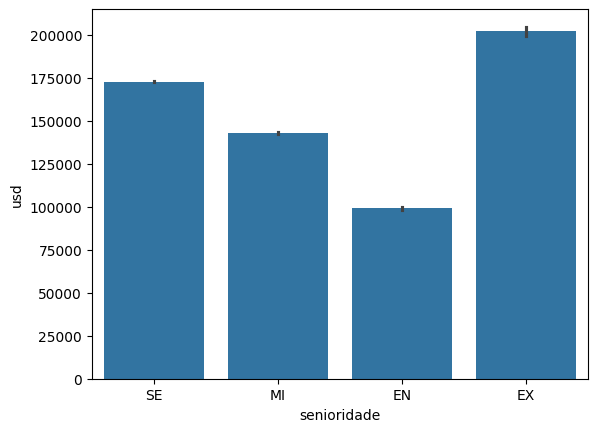

In [76]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')


In [77]:
import matplotlib.pyplot as plt

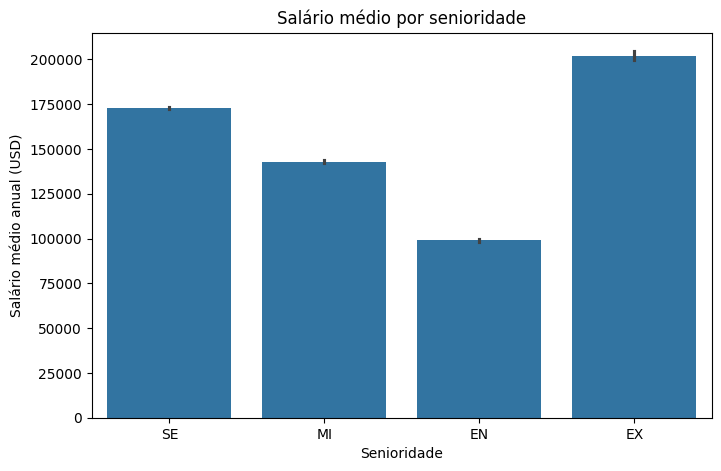

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [79]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
EX,202027.667813
SE,172850.838301
MI,143044.845979
EN,99034.963267


In [80]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index

In [81]:
ordem

Index(['EN', 'MI', 'SE', 'EX'], dtype='object', name='senioridade')